In [1]:
# Import des librairies
import pandas as pd  # pandas 
import numpy as np
import matplotlib.pyplot as plt # Pour les graphiques
import seaborn as sns # seconde librairie de visualisation
# This is to test results
from test_helper import Test

# TP DATASCIENCE -- INTRODUCTION <a class="tocSkip">

Les données que nous allons utiliser ici sont des données en provenance du site [gapminder](https://www.gapminder.org/), qui regorge de données socio-économiques sur l'évolution de la société humaine. Ce site a été créé par Hans Rosling, l'auteur du livre [Factfulness](https://www.amazon.fr/Factfulness-Hans-Rosling/dp/2081427117)

*Une question préliminaire au passage : quelle est l'espérance de vie de la population **mondiale** en 2023 ?*

- A.   50 years
- B.   60 years
- C.   70 years

Vous devriez pouvoir y répondre à partir des données de ce TP ; faites le... 

Le début du TP s'inspire d'un [projet datacamp](https://campus.datacamp.com/courses/cleaning-data-in-python/case-study-5). 

Lors de ce TP, nous aborderons les points suivants :

- lecture d'un fichier csv
- types des données, comptage, suppression des NA
- scatterplots
- tidyfication
- rassemblement de plusieurs tables (concatenation)
- histogrammes
- regroupements (groupby)
- concatenations de tables suivant une ou plusieurs colonnes
- creations de nouvelles variables
- analyse des correlations

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-des-données-et-première-exploration" data-toc-modified-id="Lecture-des-données-et-première-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lecture des données et première exploration</a></span></li><li><span><a href="#Combiner-des-tables" data-toc-modified-id="Combiner-des-tables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Combiner des tables</a></span></li><li><span><a href="#Tidyfication" data-toc-modified-id="Tidyfication-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tidyfication</a></span></li><li><span><a href="#Regroupement-et-exploitation" data-toc-modified-id="Regroupement-et-exploitation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regroupement et exploitation</a></span></li><li><span><a href="#Plus-loin---Complétons-encore-ces-données" data-toc-modified-id="Plus-loin---Complétons-encore-ces-données-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plus loin - Complétons encore ces données</a></span></li></ul></div>

## Lecture des données et première exploration

**Question 1.1** :  Lire le fichier `g1800s.csv`  et stocker le résultat dans une variable g800s. Vous utiliserez pour cela la méthode `read_csv` de pandas, cf [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). N'oubliez pas de préfixer par pd. 

In [2]:
g1800s = pd.read_csv("g1800s.csv")

In [3]:
# Afficher les premières lignes
g1800s.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,31.39,31.59,31.78,31.97,32.16,32.36,32.55,32.74,32.93,33.13
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.08,35.06,35.04,35.03,35.01,35.00,34.98,34.96,34.95,34.93
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,31.05,31.16,31.28,31.39,31.50,31.61,31.72,31.83,31.94,32.06
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,30.76,30.95,31.14,31.33,31.51,31.70,31.89,32.08,32.27,32.46


**Question 1.2** : Explorez quelles sont les caractéristiques de la table : nombre de données, dimensions, types des données. méthodes `.info`, `.describe`, `.dtypes`, attibut `.shape` 

In [5]:
g1800s.shape
g1800s.size


19897

In [7]:
g1800s.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,31.504301,31.464194,31.479946,31.386935,31.461398,31.586989,31.644731,31.598441,31.386237,31.314570,...,33.115108,33.347688,33.382688,33.473011,33.738387,33.838925,33.959624,34.064301,34.130108,34.126720
std,3.808172,3.799967,3.930641,3.956290,3.929598,4.004460,4.101342,3.971748,4.079098,4.032086,...,5.887144,5.661333,5.749977,5.946566,5.686913,5.941806,6.228897,6.262405,6.199341,6.186988
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,4.000000,8.000000,14.000000,8.140000,21.680000,21.490000,19.510000,18.520000,20.670000,19.860000
25%,29.025000,28.962500,28.912500,28.912500,28.962500,29.025000,29.025000,29.025000,28.962500,28.840000,...,30.467500,30.645000,30.422500,30.340000,30.520000,30.317500,30.280000,30.470000,30.305000,30.327500
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,32.915000,33.040000,32.985000,33.005000,33.100000,33.175000,33.335000,33.480000,33.545000,33.630000
75%,33.875000,33.895000,33.875000,33.675000,33.775000,33.875000,33.975000,33.975000,33.775000,33.675000,...,35.305000,35.432500,35.520000,35.587500,35.595000,35.720000,35.765000,35.982500,36.135000,36.262500
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,50.520000,51.130000,52.830000,52.690000,52.150000,54.210000,53.920000,54.200000,54.750000,51.700000


In [11]:
Nombre_de_lignes = g1800s.shape[0]
Nombre_de_colonnes = g1800s.shape[1]
Type_de_la_variable_1803 = (g1800s["1800"]).dtypes## FILL HERE ## #choisir entre float, string, object, int
Nombre_de_variables_qualitatives = g1800s.value_counts()

In [9]:
Test.assertEqualsHashed(Nombre_de_lignes, '61188f24396807ba7ca38919a158766de935852e')
Test.assertEqualsHashed(Nombre_de_colonnes,'dbc0f004854457f59fb16ab863a3a1722cef553f')
Test.assertEqualsHashed(Type_de_la_variable_1803,'1c737bef1c20a191fa97fbb9558e4f5cc67ac29d')
Test.assertEqualsHashed(Nombre_de_variables_qualitatives, '356a192b7913b04c54574d18c28d46e6395428ab')

1 test passed.
1 test passed.
1 test failed. 
1 test failed. 


**Question 1.3** : Evaluer quel est le nombre de données manquantes, et le pourcentage par rapport à l'ensemble des données. Utiliser par exemple `.isna()` et `.sum()` 

In [12]:
Nb_donnees_manquantes = g1800s.isna().sum().sum()
Nombre_données_totales =g1800s.size
Pourcentage_donnees_manquantes = Nb_donnees_manquantes/Nombre_données_totales*100

In [13]:
Test.assertEqualsHashed(Nb_donnees_manquantes,'b124524c4b1ade45d1deecbcdef614fadb3ec205')
Test.assertTrue(np.isclose(Pourcentage_donnees_manquantes, 5.5, rtol=0.01))

1 test passed.
1 test passed.


**Question 1.4** : En utilisant la méthode `.plot()` des objets pandas, avec les paramètres adéquats, tracez le nuage de points liant les colonnes `1800` et `1899`. Remplacez les '_____' . Evaluez la pente de la droite qui semble se dessiner. Que peut-on en conclure quant au lien entre les espérances de vies à ces deux années et son évolution dans le temps ? Comment interpréter le fait que le nuage semble dissymétrique autour de cette droite ?

Vous pouvez aussi utiliser la fonction `scatterplot` de la bibliothèque seaborn pour produite ce graphique. 

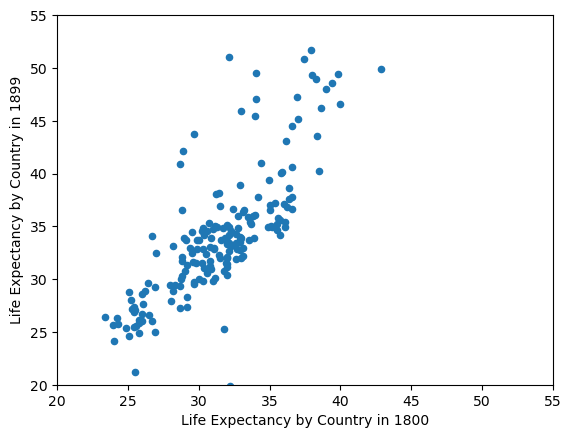

In [14]:
# scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Labels des axes
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Limites des axes
plt.xlim(20, 55)
plt.ylim(20, 55)

# show
plt.show()


Avec la librairie seaborn

In [ ]:
sns.scatterplot(data=____, x='_____', y='_____')

Utiliser la méthode `lmplot` de seaborn afin de visualiser la tendance linéaire dans les données. Que penser du fait que la droite identifiée n'a pas la même pente que celle qui semblait se dégager des observations , 

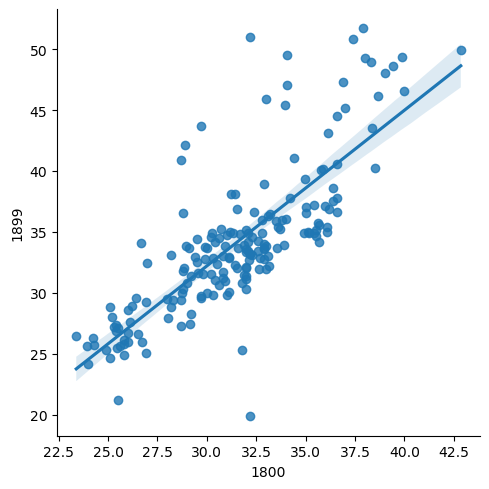

In [15]:
sns.lmplot(data=g1800s, x='1800', y='1899')

**Question 1.5** : Qualité des données :

1. vérifier que toutes les données numériques sont non négatives (ce sont des espérances de vie) 
    > Hint: 
    - (1) retirer toutes les lignes où une valeur manquante est présente, méthode `.dropna()`, 
    - (2) tester si toutes les valeurs numériques sont >=0 
    - (3) utiliser la méthode `.all()` (2 fois) pour tester que tous les résultats de tests sont True
- vérifier que tous les pays ne sont mentionnés qu'une seule fois (pas de lignes dupliquées ou d'enregistrements redondants) Hint: utiliser `.value_counts()` et vérifier que toutes les valeurs sont inférieurs ou égales à 1


In [20]:
# 1.5.1
(g1800s.dropna().loc[:,'1800'] >= 0).all().all()

True

In [21]:
#2 (solution --> comprendre)
assert g1800s['Life expectancy'].value_counts().max() == 1

## Combiner des tables

On dispose en fait des tables pour les années 1900 et 2000, sous la forme de fichiers csv  

- Charger les tables correspondantes dans des variabes `g1900s`  et `g2000s`,
- visualiser leurs caractéristiques
- concaténer ces tables suivant les lignes, sous la forme d'une nouvelle table `gapminder` 


**Question 2.1** : Charger les tables

In [23]:
g1900s = pd.read_csv("g1900s.csv")
g2000s = pd.read_csv("g2000s.csv")

In [24]:
Test.assertEqualsHashed(g2000s.shape, 'dd7e258e5680b4e7af857c81c4beae957c61f96d')

1 test passed.


**Question 2.2** : Caractéristiques

In [25]:
g1900s.shape

(197, 101)

In [26]:
g2000s.shape

(197, 24)

In [27]:
g2000s.columns

Index(['Life expectancy', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

**Question 2.3** : Concaténation

Afin de combiner les données des différents siècles, nous allons concaténer les tables suivant l'axe des lignes. 

In [28]:
# Set a common index for all dataframes
for df in [g1800s, g1900s, g2000s]:
    df.set_index('Life expectancy', inplace=True)

In [31]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=1, sort=True)
print(gapminder.head()
      )

                  1800   1801   1802   1803   1804   1805   1806   1807  \
Life expectancy                                                           
Afghanistan      28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14   
Albania          35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
Algeria          28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   
Andorra            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Angola           26.98  26.98  26.98  26.98  26.98  26.98  26.98  26.98   

                  1808   1809  ...   2013   2014   2015   2016   2017   2018  \
Life expectancy                ...                                             
Afghanistan      28.13  28.12  ...  61.93  61.93  61.91  62.03  62.90  62.73   
Albania          35.40  35.40  ...  78.28  78.21  78.14  78.23  78.33  78.44   
Algeria          28.82  28.82  ...  75.12  75.27  75.44  75.71  75.92  76.02   
Andorra            NaN    NaN  ...  81.95  81.97  82.01  82.06  82.11  82.

In [32]:
Test.assertEqualsHashed(gapminder.shape,'fe67fcd9cfc09ade258d010684f9d69f7ff014b0')

1 test passed.


- Afficher la taille et les premières lignes de `gapminder` 

In [33]:
print(gapminder.size, gapminder.head(5))

43931                   1800   1801   1802   1803   1804   1805   1806   1807  \
Life expectancy                                                           
Afghanistan      28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14   
Albania          35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
Algeria          28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   
Andorra            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Angola           26.98  26.98  26.98  26.98  26.98  26.98  26.98  26.98   

                  1808   1809  ...   2013   2014   2015   2016   2017   2018  \
Life expectancy                ...                                             
Afghanistan      28.13  28.12  ...  61.93  61.93  61.91  62.03  62.90  62.73   
Albania          35.40  35.40  ...  78.28  78.21  78.14  78.23  78.33  78.44   
Algeria          28.82  28.82  ...  75.12  75.27  75.44  75.71  75.92  76.02   
Andorra            NaN    NaN  ...  81.95  81.97  82.01  82.06  82.1

In [35]:
print(gapminder.columns)


Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object', length=223)


## Tidyfication

Le format n'est pas "tidy", car l'année est certainement une variable intéressante. Il nous faudrait probablement une table dont les colonnes seraient le pays ('country'), l'année ('year') et la variable d'intérêt ('life_expectancy'). Il nous faut donc remettre en forme cette table en un vrai "dataframe", avec un index unique, des exemples suivant les lignes et les variables suivant les colonnes. 

**Question 3.1** : Pour cela, la méthode `melt` de pandas, que vous appellerez avec `pd.melt(___)` permet de réorganiser la table. voir l'aide de [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html). Renommer ensuite les colonnes : par exemple en `'country', 'year', 'life_expectancy'`

In [36]:
# Reset index (index as line numbers + individual column "Life expectancy")
gapminder = gapminder.reset_index()
gapminder.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,61.93,61.93,61.91,62.03,62.90,62.73,63.33,63.39,63.98,64.30
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,78.28,78.21,78.14,78.23,78.33,78.44,78.50,77.90,78.73,78.84
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.12,75.27,75.44,75.71,75.92,76.02,76.20,76.20,76.56,76.74
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.95,81.97,82.01,82.06,82.11,82.14,82.19,NaN,NaN,NaN
4,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,62.13,63.01,63.52,63.87,64.24,64.63,65.08,65.20,65.78,66.11


In [42]:
# Entrer les paramètres 
gapminder_melt = pd.melt(frame= gapminder, id_vars="Life expectancy")
gapminder_melt.head()

,Life expectancy,variable,value
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Andorra,1800,NaN
4,Angola,1800,26.98


In [44]:
gapminder_melt.columns = ['country', 'year','life_expectancy']  # Renommer les colonnes,
gapminder_melt.head(10)

,country,year,life_expectancy
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Andorra,1800,NaN
4,Angola,1800,26.98
5,Antigua and Barbuda,1800,33.54
6,Argentina,1800,33.20
7,Armenia,1800,34.00
8,Australia,1800,34.05
9,Austria,1800,34.40


In [45]:
Test.assertEquals(gapminder_melt.loc[4, 'life_expectancy'], 26.98)

1 test passed.


- Renommons `gapminder_melt` en `gapminder` 

In [46]:
gapminder = gapminder_melt

- Afficher les types de `gapminder`. 

In [47]:
gapminder.dtypes

country             object
year                object
life_expectancy    float64
dtype: object

**Question 3.2** : Le type associé à `year` n'est pas entier. Convertissez le à un entier en utilisant la méthode `to_numeric` de pandas, ou `astype`

In [48]:
gapminder.year =gapminder.year.astype(int)

In [49]:
Test.assertEqualsHashed(gapminder.country.dtype, '1615307cc4523f183e777df67f168c86908e8007')
Test.assertEqualsHashed(gapminder.year.dtype, '3cf12f96228a3fa41a25040bdcc6eac3659e7844')

1 test passed.
1 test passed.


**Question 3.3 (optionnelle)** Parfois les chaînes de caractères contiennent des caractères interdits, ou que l'on souhaite éviter afin de garantir un portabilité. Cette question vou smontre comment repérer des tels cas de figure. Elle utilise la notion d'expression régulière. Pour ceux qui ne connaissent pas, vous êtes invités à vous référer à l'excellent [Kit de survie Python](https://perso.esiee.fr/~bercherj/EL3029/Intro_Python.html#Expressions-régulières) et aux références fournies dans ce texte. 

- Extraire la colonne `country` de la table et supprimer les lignes dupliquées `.drop_duplicates()`
- Rechercher, en utilisant une expression régulière, tous les noms de pays qui contiennent d'autres caractères que les lettres de l'alphabet, espaces, et point. 

La cellule suivante contient la racine des choses. 

In [53]:
# Create the series of countries: countries
countries = pd.Series(gapminder.country)
# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$' ## FILL HERE ##

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries[mask_inverse]

# Print invalid_countries
print(invalid_countries)


41     Cote d'Ivoire
69     Guinea-Bissau
176      Timor-Leste
Name: country, dtype: object


<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/var/folders/pd/3rcrcz4d0f9cd_p_f3x_ll2r0000gn/T/ipykernel_27805/1270135150.py:7: SyntaxWarning: invalid escape sequence '\.'
  pattern = '^[A-Za-z\.\s]*$' ## FILL HERE ##


Ensuite, on pourrait corriger tous les noms de pays en remplaçant les caractères interdits. On ne le fera pas ici. Personnellement, je remplacerais bien tous les espaces par des `_`. 

## Regroupement et exploitation

Nous allons maintenant calculer des statistiques élémentaires sur des groupes. Le regroupement le plus simple est pas années. Il aurait été intéressant d'ajouter un traitement par région, ou par continent, mais la donnée n'est pas présente et ce sera donc pour une autre fois. 

**Question 4.1** Tracer un histogramme de l'espérance de vie. Utiliser la méthode `.plot` des dataframes ou `displot` de seaborn. 

<Axes: ylabel='Frequency'>

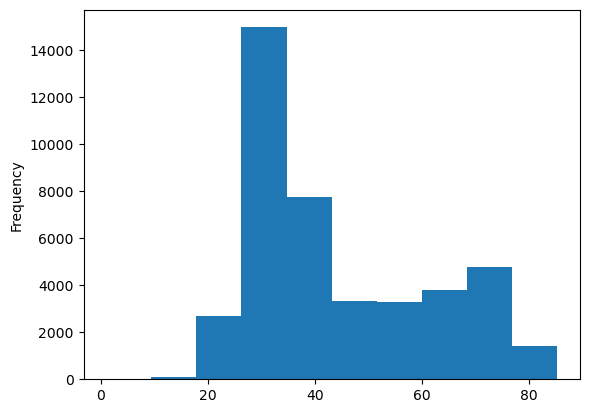

In [54]:
gapminder.life_expectancy.plot(kind='hist')

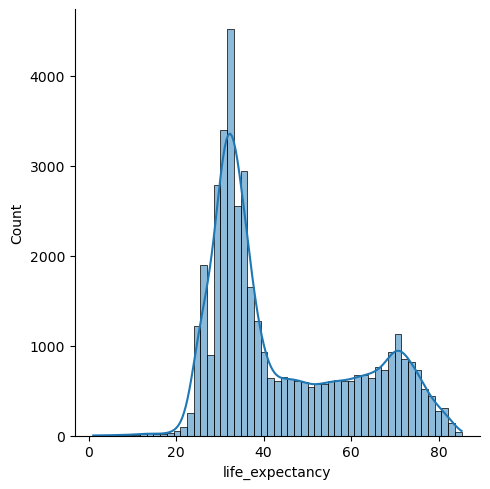

In [55]:
sns.displot(gapminder.life_expectancy.dropna(), kind='hist', kde=True)#, element='step')

**Question 4.2** 
En réfléchissant deux minutes, cet histogramme a-t-il vraiment un sens ? Ou du moins ne peut-on pas faire un peu mieux ? Tracer par exemple les histogrammes pour le 19e siècle (les années <1900) et pour le 20e siècle (donc les années supérieures à 1899 et inférieures à 2000), et encore pour le 21e (les années >1999)

Pour cela, vous devrez filtrer les données. 

Voici pour le second item : 
```
idx = (gapminder['year']>=1900) & (gapminder['year']<2000)
gapminder[idx]
```

Si vous utilisez seaborn, celui-ci n'aime pas les données manquantes, et vous utiliserez un `dropna()` au passage.

In [56]:
# Read standard matplotlib colors in colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

<Axes: xlabel='life_expectancy', ylabel='Density'>

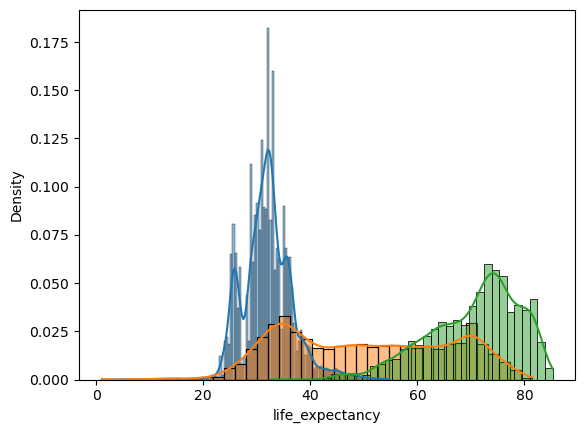

In [57]:

sns.histplot(gapminder[gapminder['year']<1900].life_expectancy.dropna(), kde=True, stat='density', color=colors[0])
idx = (gapminder['year']>=1900) & (gapminder['year']<2000)
sns.histplot(gapminder[idx].life_expectancy.dropna(),  kde=True, stat='density', color=colors[1])
sns.histplot(gapminder[gapminder['year']>1999].life_expectancy.dropna(),  kde=True, stat='density', color=colors[2])

<Axes: xlabel='life_expectancy', ylabel='Density'>

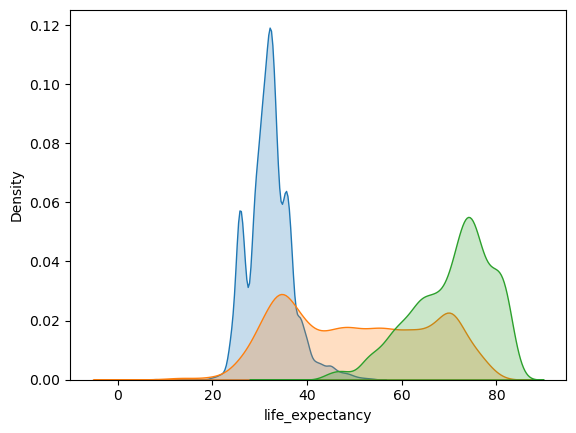

In [58]:
sns.kdeplot(gapminder[gapminder['year']<1900].life_expectancy.dropna(),  fill=True)
idx = (gapminder['year']>=1900) & (gapminder['year']<2000)
sns.kdeplot(gapminder[idx].life_expectancy.dropna(), fill=True)
sns.kdeplot(gapminder[gapminder['year']>1999].life_expectancy.dropna(), fill=True)

- Une autre possibilité est de créer une colonne catégorielle, disons siecle, permettant de définir des intervalles (les siècles, donc) à partie de la colonne `year`. Pour cela, vous utiliserez la commande `pd.cut()` [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

In [59]:
gapminder['siecle'] = pd.cut(gapminder['year'], [1799, 1899, 1999, 2100], labels=['19e', '20e', '21e' ])

Vous pourrez ensuite utiliser `sns.distplot` en reprenant et adaptant ce bout de code
```
groups = iris.dropna().groupby('species')
for l,group in groups:
    sns.histplot(group['petal_length'], stat='density', label=l, color=colors[k])
    k = k + 1
plt.legend()
```

In [60]:
# On extrait la liste des couleurs de matplotlib
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

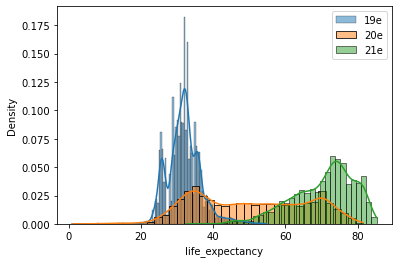

In [128]:
k = 0
groups = gapminder.dropna().groupby('siecle')
for l,group in groups:
    # fill here
    k = k + 1
plt.legend()

**Question 4.3** On va maintenant regrouper les données par années et chercher à tracer l'évolution de l'espérance de vie moyenne en fonction du temps. 

- Utiliser la commande `.groupby()` pour regrouper par années, en créant une variable `gapminder_agg`, puis calculer la moyenne de `life_expectancy` sur ces groupes

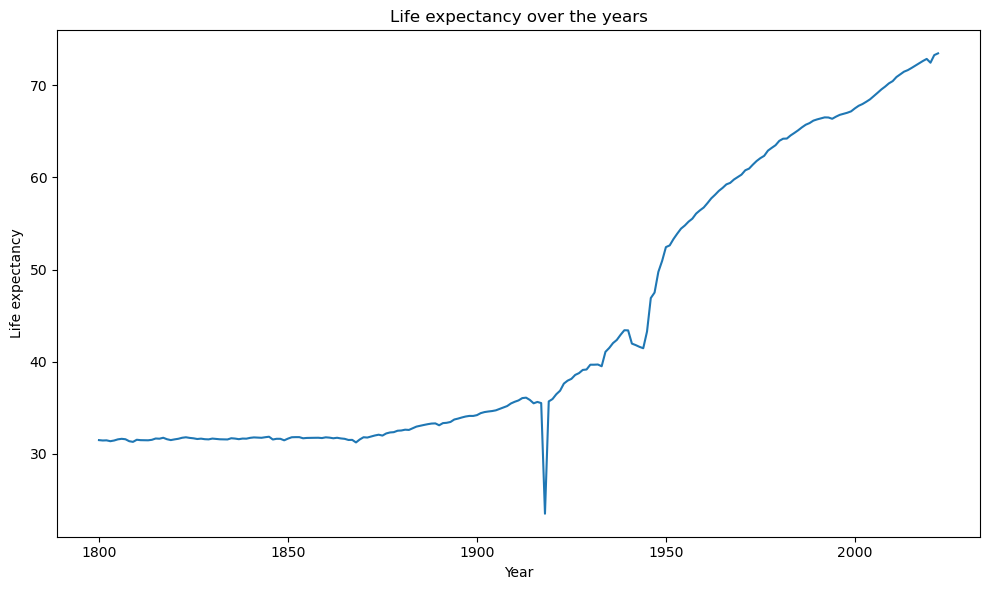

In [63]:
#%matplotlib widget
# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

plt.figure(figsize=(10,6))

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

On peut donc voir l'évolution de la poulation mondiale et constater que l'expérance de vie moyenne mondiale dépasse maintenant les 70 ans ! Réponse à la question de l'introduction. A quoi sont liés les deux décrochements que l'on peut observer sur la courbe ?      

Ceci n'est pas complètement juste dans la mesure où nous moyennons les espérances de vies par pays, alors que les pays en question n'ont pas les mêmes populations... 

On va essayer de faire mieux, ou au moins plus scientifique. Pour cela on peut compléter nos données avec des données récuérées sur le site gapminder.
